In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV

In [2]:
prosper = pd.read_csv('prosperLoanData.csv')
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
prosper = prosper.drop_duplicates()

In [5]:
prosper.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.320191,-0.029314,-0.112241,-0.111384,-0.216325,-0.239349,-0.459091,0.209065,-0.106398,...,0.203554,0.103618,-0.250597,-0.246585,-0.095735,0.014031,-0.125503,-0.092433,-0.053279,-0.277339
Term,0.320191,1.000000,-0.010810,0.020376,0.020849,0.057197,-0.108414,0.154055,0.080679,0.028256,...,-0.170285,0.035649,-0.037718,-0.035344,-0.034074,-0.029188,-0.056543,-0.043445,-0.024438,-0.044565
BorrowerAPR,-0.029314,-0.010810,1.000000,0.989817,0.989319,0.894989,0.949343,0.793796,-0.962202,-0.669848,...,0.118539,-0.041308,0.066924,0.067016,0.028414,-0.028152,-0.044564,-0.047062,-0.032024,-0.309448
BorrowerRate,-0.112241,0.020376,0.989817,1.000000,0.999207,0.894608,0.945047,0.817298,-0.953102,-0.651294,...,0.097843,-0.053204,0.100209,0.099890,0.041944,-0.028906,-0.030953,-0.037653,-0.026716,-0.276258
LenderYield,-0.111384,0.020849,0.989319,0.999207,1.000000,0.894669,0.945059,0.817282,-0.953116,-0.651342,...,0.099716,-0.052780,0.099078,0.098775,0.040909,-0.029092,-0.031445,-0.037644,-0.026837,-0.276219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PercentFunded,0.014031,-0.029188,-0.028152,-0.028906,-0.029092,-0.043223,-0.022595,-0.038997,0.012345,-0.019357,...,0.069340,0.006108,-0.012970,-0.013407,0.000832,1.000000,0.009690,0.001683,0.003372,-0.049552
Recommendations,-0.125503,-0.056543,-0.044564,-0.030953,-0.031445,-0.047007,0.004009,-0.020367,0.004808,0.026668,...,-0.038381,-0.015777,0.041081,0.040610,0.016752,0.009690,1.000000,0.718110,0.322056,0.073369
InvestmentFromFriendsCount,-0.092433,-0.043445,-0.047062,-0.037653,-0.037644,-0.064273,0.009332,-0.043574,0.007931,0.028435,...,-0.034581,-0.008220,0.020711,0.020132,0.010039,0.001683,0.718110,1.000000,0.483487,0.058550
InvestmentFromFriendsAmount,-0.053279,-0.024438,-0.032024,-0.026716,-0.026837,-0.038378,0.024549,-0.032208,-0.010421,0.003107,...,-0.056509,-0.010086,0.028645,0.028185,0.018566,0.003372,0.322056,0.483487,1.000000,0.011994


In [6]:
prosper.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [7]:
#'DateCreditPulled', 'ClosedDate','ListingCreationDate','LoanOriginationDate', 'FirstRecordedCreditLine',

In [8]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [40]:
numeric_features = list(prosper[['Term','BorrowerAPR',\
                                 'BorrowerRate','LenderYield','ListingCategory (numeric)','EmploymentStatusDuration',\
                                 'CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines',\
                                 'OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment',\
                                 'CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years',\
                                 'PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit',\
                                 'StatedMonthlyIncome','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments',\
                                 'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed',\
                                 'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanMonthsSinceOrigination',\
                                 'LoanOriginalAmount','MonthlyLoanPayment','LP_CustomerPayments','LP_CustomerPrincipalPayments',\
                                 'LP_InterestandFees','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']])
                                                              
                                 

In [10]:
len(numeric_features)

41

In [11]:
categorical_features = list(prosper[['BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner',\
                                     'CurrentlyInGroup','IncomeVerifiable']])

In [12]:
len(categorical_features)

6

In [13]:
numeric_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_features)),
        ('cat_encoder', OneHotEncoder(sparse=False,
                                      handle_unknown='ignore')),
    ])



full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numeric_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline2 = ColumnTransformer([
        ("num_pipeline", numeric_pipeline, numeric_features ),
        ("cat_pipeline", categorical_pipeline, categorical_features ),
    ])

In [14]:
train_set, test_set = train_test_split(prosper, test_size=0.1, random_state=42)

In [15]:
prosper_prepared = full_pipeline2.fit_transform(train_set)
prosper_prepared

array([[-0.46083468, -0.75366868, -0.84179769, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46083468,  0.0543477 ,  0.10708672, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46083468, -1.20481633, -1.13407011, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.84026332, -0.16240688, -0.14781753, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46083468, -1.51100548, -1.45570322, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.84026332, -0.19159733, -0.11311853, ...,  0.        ,
         0.        ,  1.        ]])

In [16]:
X_train = prosper_prepared

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)


In [17]:
X_train = prosper_prepared

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)

clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=5000).fit(X_train, y_train)
#clf.score(X_train, y_train)

In [18]:
clf.score(X_train, y_train)

0.9699486040546782

In [19]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     97214
           1       0.85      0.40      0.54      4545

    accuracy                           0.97    101759
   macro avg       0.91      0.70      0.76    101759
weighted avg       0.97      0.97      0.96    101759



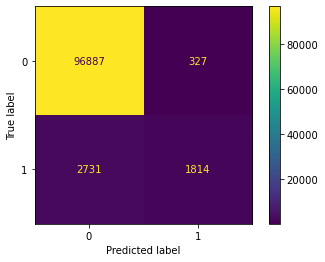

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [65]:
feature_names = np.array(numeric_features).view() 

In [66]:
def get_feature_names():  
        
        column_transformer = full_pipeline2 
        
        new_feature_names = np.insert(feature_names,0,'')

        for i, transformer_item in enumerate(column_transformer.transformers_):
            
            transformer_name, transformer, orig_feature_names = transformer_item
            orig_feature_names = list(orig_feature_names)
                
            if isinstance(transformer, Pipeline):
                # if pipeline, get the last transformer in the Pipeline
                transformer = transformer.steps[-1][1]

            if hasattr(transformer, 'get_feature_names'):

                if 'input_features' in transformer.get_feature_names.__code__.co_varnames:
                    names = list(transformer.get_feature_names(orig_feature_names))
                else:
                    names = list(transformer.get_feature_names())
                new_feature_names= np.append(new_feature_names,names)
                
        return new_feature_names

In [67]:
column_name = get_feature_names()
len(column_name)

177

In [68]:
print(len(numeric_features))

41


In [23]:
log_reg = LogisticRegression(penalty='l1',solver="liblinear", random_state=42)

param_grid = [
    {'C': [0.001, 0.01, 0.1, 1]},
  ]

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best alpha value is: ", grid_search.best_params_)

Best alpha value is:  {'C': 1}


Classification report: 
 
                precision    recall  f1-score   support

           0       0.97      1.00      0.98     97214
           1       0.85      0.39      0.54      4545

    accuracy                           0.97    101759
   macro avg       0.91      0.70      0.76    101759
weighted avg       0.97      0.97      0.96    101759



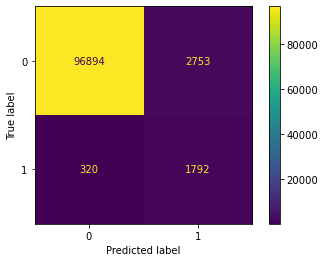

In [24]:
lg_reg = grid_search.best_estimator_

y_pred = lg_reg.predict(X_train)


cm = confusion_matrix(y_pred, y_train, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_reg.classes_)
disp.plot()

print("Classification report: \n \n ", classification_report(y_train, y_pred, zero_division=0))
plt.show()

In [69]:
len(column_name)
len(numeric_features)

41

Feature: Term, Score: -0.84007
Feature: BorrowerAPR, Score: -1.11591
Feature: BorrowerRate, Score: 1.78975
Feature: LenderYield, Score: -0.23141
Feature: ListingCategory (numeric), Score: 0.06896
Feature: EmploymentStatusDuration, Score: -0.00004
Feature: CreditScoreRangeLower, Score: 0.00729
Feature: CreditScoreRangeUpper, Score: 0.09494
Feature: CurrentCreditLines, Score: 0.27386
Feature: OpenCreditLines, Score: -0.11801
Feature: TotalCreditLinespast7years, Score: 0.09610
Feature: OpenRevolvingAccounts, Score: -0.10529
Feature: OpenRevolvingMonthlyPayment, Score: 0.14057
Feature: CurrentDelinquencies, Score: 0.04784
Feature: AmountDelinquent, Score: -0.01942
Feature: DelinquenciesLast7Years, Score: -0.12345
Feature: PublicRecordsLast10Years, Score: -0.02470
Feature: PublicRecordsLast12Months, Score: -0.00398
Feature: RevolvingCreditBalance, Score: -0.01825
Feature: BankcardUtilization, Score: -0.00393
Feature: AvailableBankcardCredit, Score: -0.13488
Feature: StatedMonthlyIncome, Sco

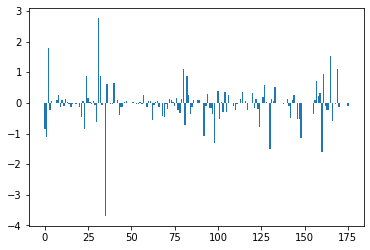

In [70]:
from matplotlib import pyplot
importance = lg_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (column_name[i+1],v))
        
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [71]:
features = pd.DataFrame({'features': column_name[1:] , 'importance': list(importance)}, columns=['features', 'importance'])
## Negative importance coefficient also should be taken in consideration since it is somehow correlated negatively with the possibility of a user to apply for term deposit so :
features["importance"]= np.abs(features["importance"])
features = features.sort_values(by=['importance'], ascending=False)
features
Unimportante_features = features[features["importance"]==0]["features"].array
len(Unimportante_features)


30

In [72]:
for j in Unimportante_features:
    for i in numeric_features:
        if i == j:
            numeric_features.remove(i)

In [73]:
for j in Unimportante_features:
    for i in categorical_features:
        if i == j:
            categorical_features.remove(i)

In [74]:
len(numeric_features)

40

In [75]:
len(categorical_features)

6

In [76]:
numeric_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_features)),
        ('cat_encoder', OneHotEncoder(sparse=False,
                                      handle_unknown='ignore')),
    ])



full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numeric_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline2 = ColumnTransformer([
        ("num_pipeline", numeric_pipeline, numeric_features ),
        ("cat_pipeline", categorical_pipeline, categorical_features ),
    ])

In [77]:
prosper_prepared = full_pipeline2.fit_transform(train_set)
X_train = prosper_prepared

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)
X_train = prosper_prepared


clf = LogisticRegressionCV(cv=5, random_state=42, max_iter=5000).fit(X_train, y_train)
clf.score(X_train, y_train)

0.9699191226328875

In [78]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     97214
           1       0.85      0.40      0.54      4545

    accuracy                           0.97    101759
   macro avg       0.91      0.70      0.76    101759
weighted avg       0.97      0.97      0.96    101759



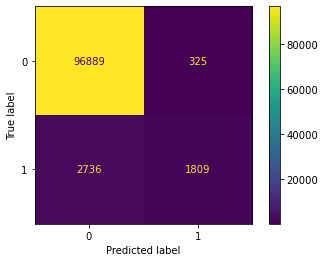

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [80]:
column_name = get_feature_names()

In [81]:
log_reg = LogisticRegression(penalty='l1',solver="liblinear", random_state=42, max_iter= 5000)

param_grid = [
    {'C': [0.001, 0.01, 0.1, 1]},
  ]

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best alpha value is: ", grid_search.best_params_)

Best alpha value is:  {'C': 1}


Classification report: 
 
                precision    recall  f1-score   support

           0       1.00      0.97      0.98     99647
           1       0.39      0.85      0.54      2112

    accuracy                           0.97    101759
   macro avg       0.70      0.91      0.76    101759
weighted avg       0.98      0.97      0.98    101759



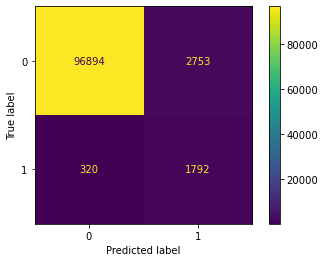

In [82]:
lg_reg = grid_search.best_estimator_

y_pred = lg_reg.predict(X_train)


cm = confusion_matrix(y_pred, y_train, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_reg.classes_)
disp.plot()

print("Classification report: \n \n ", classification_report(y_pred, y_train))
plt.show()

Feature: Term, Score: -0.84010
Feature: BorrowerAPR, Score: -1.11607
Feature: BorrowerRate, Score: 1.79027
Feature: LenderYield, Score: -0.23178
Feature: ListingCategory (numeric), Score: 0.06896
Feature: EmploymentStatusDuration, Score: -0.00003
Feature: CreditScoreRangeLower, Score: 0.06856
Feature: CreditScoreRangeUpper, Score: 0.03365
Feature: CurrentCreditLines, Score: 0.27386
Feature: OpenCreditLines, Score: -0.11803
Feature: TotalCreditLinespast7years, Score: 0.09612
Feature: OpenRevolvingAccounts, Score: -0.10528
Feature: OpenRevolvingMonthlyPayment, Score: 0.14058
Feature: CurrentDelinquencies, Score: 0.04784
Feature: AmountDelinquent, Score: -0.01942
Feature: DelinquenciesLast7Years, Score: -0.12345
Feature: PublicRecordsLast10Years, Score: -0.02471
Feature: PublicRecordsLast12Months, Score: -0.00398
Feature: RevolvingCreditBalance, Score: -0.01825
Feature: BankcardUtilization, Score: -0.00394
Feature: AvailableBankcardCredit, Score: -0.13486
Feature: StatedMonthlyIncome, Sco

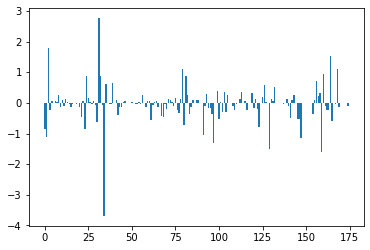

In [83]:
from matplotlib import pyplot
importance = lg_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (column_name[i+1],v))
        
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

(0.0, 1.0)

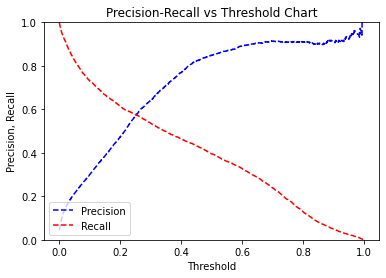

In [84]:
### Predict test_y values and probabilities based on fitted logistic regression model
from sklearn import metrics
predTest = lg_reg.predict(X_train)

probs_y=lg_reg.predict_proba(X_train) 
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_train, probs_y[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

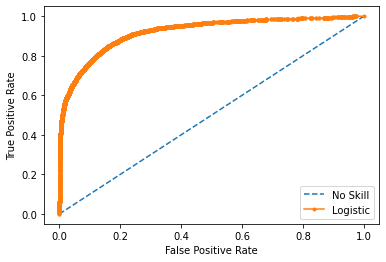

In [85]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# predict probabilities
yhat =lg_reg.predict_proba(X_train) 
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

##Running the example fits a logistic regression model on the training dataset 
##Then evaluates it using a range of thresholds on the test set, creating the ROC Curve

In [86]:
from numpy import * 
yhat = lg_reg.predict_proba(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold= %f' % (best_thresh))

Best Threshold= 0.041471


In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report
THRESHOLD = best_thresh
preds = np.where(lg_reg.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

In [88]:
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     97214
           1       0.20      0.85      0.32      4545

    accuracy                           0.84    101759
   macro avg       0.59      0.84      0.62    101759
weighted avg       0.96      0.84      0.88    101759



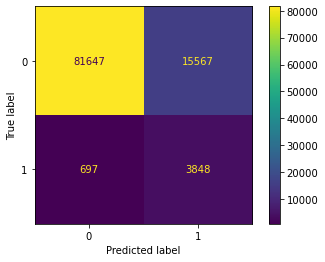

In [89]:
CM = confusion_matrix(y_train, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     11070
           1       0.40      0.80      0.53       237

    accuracy                           0.97     11307
   macro avg       0.70      0.89      0.76     11307
weighted avg       0.98      0.97      0.98     11307



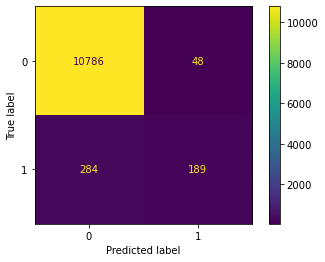

In [97]:
#### testing with logistic regression
bank_prepared2 = full_pipeline2.fit_transform(test_set)

X_test = bank_prepared2
y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)
predTest = lg_reg.predict(X_test)

print(classification_report(predTest, y_test))
CM = confusion_matrix(y_test, predTest, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      9098
           1       0.86      0.18      0.30      2209

    accuracy                           0.83     11307
   macro avg       0.85      0.59      0.60     11307
weighted avg       0.84      0.83      0.79     11307



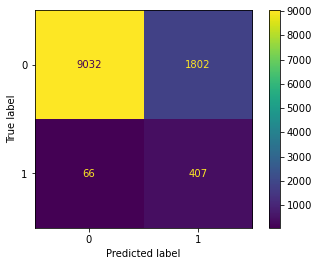

In [102]:
#### after changing the threshold with the test set
preds = np.where(lg_reg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(classification_report(preds, y_test))
CM = confusion_matrix(y_test, preds, labels=lg_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

In [96]:
###########Random forest


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, n_estimators=10, random_state= 42)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

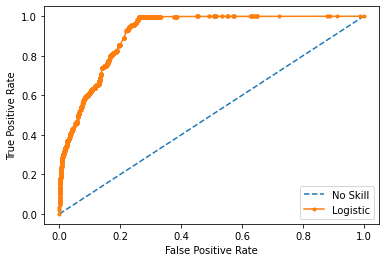

New threshold :  0.04404675251055894




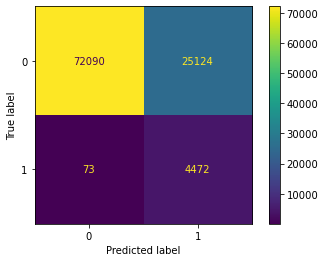

In [91]:
from numpy import * 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report

y_train = train_set[["LoanStatus"]].values.ravel()
y_train = (y_train == "Defaulted").astype(int)
y_pred= rf.predict(X_train)

yhat = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
THRESHOLD1 = best_thresh
print("New threshold : ", THRESHOLD1)
print("\n")
preds = np.where(rf.predict_proba(X_train)[:,1] > THRESHOLD1, 1, 0)
CM = confusion_matrix(y_train, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=rf.classes_)
disp.plot()
plt.show()

(0.0, 1.0)

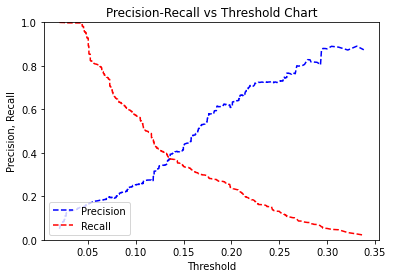

In [95]:
### Predict test_y values and probabilities based on fitted logistic regression model
from sklearn import metrics
predTest = rf.predict(X_train)

probs_y= rf.predict_proba(X_train) 
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_train, probs_y[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [94]:
print("Classification report: \n \n ", classification_report(y_train, y_pred ,zero_division=0 ))

Classification report: 
 
                precision    recall  f1-score   support

           0       0.96      1.00      0.98     97214
           1       0.00      0.00      0.00      4545

    accuracy                           0.96    101759
   macro avg       0.48      0.50      0.49    101759
weighted avg       0.91      0.96      0.93    101759



              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11307
           1       0.00      0.00      0.00         0

    accuracy                           0.96     11307
   macro avg       0.50      0.48      0.49     11307
weighted avg       1.00      0.96      0.98     11307



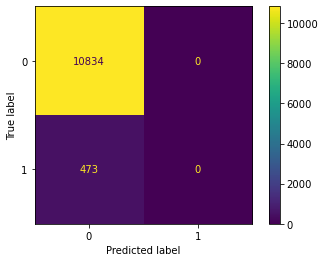

In [105]:
#### testing with random forest
bank_prepared2 = full_pipeline2.fit_transform(test_set)

X_test = bank_prepared2
y_test = test_set[["LoanStatus"]].values.ravel()
y_test = (y_test == "Defaulted").astype(int)
predTest = rf.predict(X_test)

print(classification_report(predTest, y_test,zero_division=0))
CM = confusion_matrix(y_test, predTest, labels=lg_reg.classes_, )
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=lg_reg.classes_)
disp.plot()
plt.show()

In [ ]:
#prosper["ListingCreationDate"] = pd.to_datetime(prosper["ListingCreationDate"], format= "%Y/%m/%d")
#prosper["ListingCreationDate"]= prosper["ListingCreationDate"].dt.date
#prosper["ClosedDate"] = pd.to_datetime(prosper["ClosedDate"], format= "%Y/%m/%d")
#prosper["ClosedDate"]= prosper["ClosedDate"].dt.date
#prosper["DateCreditPulled"] = pd.to_datetime(prosper["DateCreditPulled"], format= "%Y/%m/%d")
#prosper["DateCreditPulled"]= prosper["DateCreditPulled"].dt.date
#prosper["FirstRecordedCreditLine"] = pd.to_datetime(prosper["FirstRecordedCreditLine"], format= "%Y/%m/%d")
#prosper["FirstRecordedCreditLine"]= prosper["FirstRecordedCreditLine"].dt.date
#prosper["LoanOriginationDate"] = pd.to_datetime(prosper["LoanOriginationDate"], format= "%Y/%m/%d")
#prosper["LoanOriginationDate"]= prosper["LoanOriginationDate"].dt.date